# Descriptive Spatial Analysis

#### !!! As this notebook uses h3 package it will NOT WORK ON WINDOWS !!!

This notebook reads in hexagon files and does a desprictive spatial analysis.

### What is done?
1. Load Hexagon files
2. TODO

### Input

- data/output/Trips_Hexagons.csv

### Output
- Nothing, only plots
    
---------------------------------------------------------

In [1]:
import os
import pandas as pd
from h3 import h3
from shapely.geometry import shape
import geopandas
import matplotlib.pyplot as plt
import folium
from folium.plugins import TimeSliderChoropleth
import branca.colormap as cm

In [2]:
path_trips_hex=os.path.join(os.getcwd(), "..", "data", "output", "Trips.csv")
path_hex_small=os.path.join(os.getcwd(), "..", "data", "output", "hexagons-small-dresden.geojson")
path_hex_big=os.path.join(os.getcwd(), "..", "data", "output", "hexagons-big-dresden.geojson")

print(path_trips_hex)
print(path_hex_small)
print(path_hex_big)

/home/jovyan/work/notebooks/../data/output/Trips.csv
/home/jovyan/work/notebooks/../data/output/hexagons-small-dresden.geojson
/home/jovyan/work/notebooks/../data/output/hexagons-big-dresden.geojson


In [3]:
df_trips_hex = pd.read_csv(path_trips_hex, index_col="Unnamed: 0")
df_trips_hex

,p_bike_racks_start,p_spot_start,p_booked_bikes_start,p_place_type_start,datetime_start,b_number_start,p_uid_start,p_bikes_start,p_lat_start,b_electric_lock_start,...,trip_duration,idle_time,24_sum,6_sum,2_sum,1_sum,h3_hex_small_id_start,h3_hex_small_id_end,h3_hex_big_id_start,h3_hex_big_id_end
0,0,False,0,12,2019-01-20 00:00:00,93771,12095573,1,51.071262,False,...,28.0,0.0,265,36,19,8,891f1b54bb3ffff,891f1b5598fffff,881f1b54bbfffff,881f1b5599fffff
1,0,True,0,0,2019-01-20 00:05:00,93576,10299640,5,51.038210,False,...,10.0,0.0,265,33,17,17,891f1b46097ffff,891f1b465dbffff,881f1b4609fffff,881f1b465dfffff
2,0,True,0,0,2019-01-20 00:07:00,93440,10299584,1,51.042570,True,...,26.0,0.0,265,33,17,17,891f1b55903ffff,891f1b46003ffff,881f1b5591fffff,881f1b4601fffff
3,0,False,0,12,2019-01-20 00:07:00,93322,12098234,1,51.041798,False,...,2.0,0.0,265,33,17,17,891f1b5591bffff,891f1b5591bffff,881f1b5591fffff,881f1b5591fffff
4,0,True,0,0,2019-01-20 00:07:00,93585,264575,5,51.071740,False,...,28.0,0.0,265,33,17,17,891f1b54b97ffff,891f1b54b97ffff,881f1b54b9fffff,881f1b54b9fffff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567434,0,True,0,0,2020-01-20 23:29:00,93857,310792,6,51.038466,True,...,20.0,25.0,1050,75,23,3,891f1b5592bffff,891f1b5486fffff,881f1b5593fffff,881f1b5487fffff
567435,0,True,0,0,2020-01-20 23:29:00,93908,11248297,3,51.043537,True,...,17.0,27.0,1050,75,23,3,891f1b55933ffff,891f1b46003ffff,881f1b5593fffff,881f1b4601fffff
567436,0,True,0,0,2020-01-20 23:31:00,93334,264575,4,51.071740,True,...,5.0,125.0,1050,75,23,3,891f1b54b97ffff,891f1b54bb3ffff,881f1b54b9fffff,881f1b54bbfffff
567437,0,True,0,0,2020-01-20 23:33:00,93824,73,1,51.065184,True,...,12.0,99.0,1050,75,23,3,891f1b54b13ffff,891f1b54897ffff,881f1b54b1fffff,881f1b5489fffff


,h3_hex_small_id,geometry
0,891f1b4458bffff,"POLYGON ((13.77489 50.99978, 13.77501 50.99810..."
1,891f1b56b83ffff,"POLYGON ((13.71679 51.12241, 13.71690 51.12074..."
2,891f1b0b113ffff,"POLYGON ((13.82129 51.12342, 13.82140 51.12175..."
3,891f1b08627ffff,"POLYGON ((13.86001 51.10297, 13.86012 51.10129..."
4,891f1b09cb3ffff,"POLYGON ((13.88648 51.07928, 13.88659 51.07761..."
...,...,...
3201,891f1b46ad7ffff,"POLYGON ((13.80461 51.00149, 13.80472 50.99981..."
3202,891f1b198c3ffff,"POLYGON ((13.75570 51.17249, 13.75581 51.17082..."
3203,891f1b56d27ffff,"POLYGON ((13.73491 51.14864, 13.73502 51.14697..."
3204,891f1b0917bffff,"POLYGON ((13.84285 51.06167, 13.84296 51.06000..."


,h3_hex_big_id,geometry
0,881f1b4637fffff,"POLYGON ((13.76200 51.00660, 13.75981 51.00227..."
1,881f1b54a9fffff,"POLYGON ((13.70041 51.07108, 13.69822 51.06675..."
2,881f1b5591fffff,"POLYGON ((13.68728 51.04511, 13.68509 51.04078..."
3,881f1b5413fffff,"POLYGON ((13.67885 51.09501, 13.67667 51.09068..."
4,881f1b54dbfffff,"POLYGON ((13.74526 51.10644, 13.74307 51.10211..."
...,...,...
460,881f1b56ddfffff,"POLYGON ((13.70214 51.15428, 13.69995 51.14996..."
461,881f1b54b1fffff,"POLYGON ((13.73809 51.06572, 13.73590 51.06139..."
462,881f1b0b63fffff,"POLYGON ((13.76442 51.11762, 13.76222 51.11330..."
463,881f1b4663fffff,"POLYGON ((13.71837 51.02676, 13.71618 51.02243..."


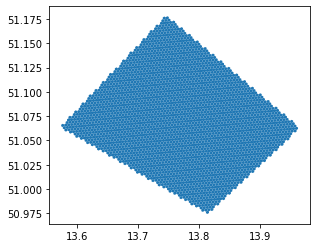

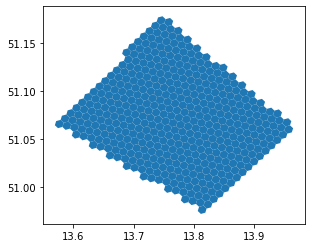

In [4]:
gdf_hex_small = geopandas.read_file(path_hex_small)
# gdf_hex_small.rename({"h3_hex_sma": "h3_hex_small_id"}, inplace=True, axis=1)
gdf_hex_small.plot()

gdf_hex_big = geopandas.read_file(path_hex_big)
# gdf_hex_big.rename({"h3_hex_big": "h3_hex_big_id"}, inplace=True, axis=1)
gdf_hex_big.plot()

display(gdf_hex_small, gdf_hex_big)

## 2. Create GeoDataFrames

In [6]:
gdf_hex_small = geopandas.read_file(path_hex_small)
gdf_hex_big = geopandas.read_file(path_hex_big)
display(gdf_hex_small, gdf_hex_big)

,h3_hex_small_id,geometry
0,891f1b4458bffff,"POLYGON ((13.77489 50.99978, 13.77501 50.99810..."
1,891f1b56b83ffff,"POLYGON ((13.71679 51.12241, 13.71690 51.12074..."
2,891f1b0b113ffff,"POLYGON ((13.82129 51.12342, 13.82140 51.12175..."
3,891f1b08627ffff,"POLYGON ((13.86001 51.10297, 13.86012 51.10129..."
4,891f1b09cb3ffff,"POLYGON ((13.88648 51.07928, 13.88659 51.07761..."
...,...,...
3201,891f1b46ad7ffff,"POLYGON ((13.80461 51.00149, 13.80472 50.99981..."
3202,891f1b198c3ffff,"POLYGON ((13.75570 51.17249, 13.75581 51.17082..."
3203,891f1b56d27ffff,"POLYGON ((13.73491 51.14864, 13.73502 51.14697..."
3204,891f1b0917bffff,"POLYGON ((13.84285 51.06167, 13.84296 51.06000..."


,h3_hex_big_id,geometry
0,881f1b4637fffff,"POLYGON ((13.76200 51.00660, 13.75981 51.00227..."
1,881f1b54a9fffff,"POLYGON ((13.70041 51.07108, 13.69822 51.06675..."
2,881f1b5591fffff,"POLYGON ((13.68728 51.04511, 13.68509 51.04078..."
3,881f1b5413fffff,"POLYGON ((13.67885 51.09501, 13.67667 51.09068..."
4,881f1b54dbfffff,"POLYGON ((13.74526 51.10644, 13.74307 51.10211..."
...,...,...
460,881f1b56ddfffff,"POLYGON ((13.70214 51.15428, 13.69995 51.14996..."
461,881f1b54b1fffff,"POLYGON ((13.73809 51.06572, 13.73590 51.06139..."
462,881f1b0b63fffff,"POLYGON ((13.76442 51.11762, 13.76222 51.11330..."
463,881f1b4663fffff,"POLYGON ((13.71837 51.02676, 13.71618 51.02243..."


In [35]:
def plot_choropleth_map(df, hex_size="small"):
    """Plots a choropleth graph on a map based on the number of started trips in each hexagon.
    The fixed bike stations are marked as well
    
    Args:
        p_df (DataFrame):   DataFrame with trip data from nuremberg
        p_mode (str):       String which contains mode in which program is running
    
    Returns:
        no return
    """
    
    if (hex_size == "small"):
        hex_id_column_to_aggregate_on = "h3_hex_small_id_start"
        other_hex_id_column = "h3_hex_big_id_start"
        gdf_hexagons = gdf_hex_small
        gdf_hex_id_column = "h3_hex_small_id"
    elif (hex_size == "big"):
        hex_id_column_to_aggregate_on = "h3_hex_big_id_start"
        other_hex_id_column = "h3_hex_small_id_start"
        gdf_hexagons = gdf_hex_big
        gdf_hex_id_column = "h3_hex_big_id"
    else:
        print("Wrong hex_size given. Choose either 'small' or 'big' and try again.")
        return
    
    df_map = df[[hex_id_column_to_aggregate_on, other_hex_id_column, "booking_date_start"]].copy()
    df_map["booking_date_start"] = pd.to_datetime(df_map["booking_date_start"]).dt.date
    # TODO: Somehow normalize values / kick out high values
    df_map = df_map[(df_map["booking_date_start"].astype(str) != "2019-02-12") & (df_map["booking_date_start"].astype(str) != "2019-02-13") & (df_map["booking_date_start"].astype(str) != "2019-03-04") & (df_map["booking_date_start"].astype(str) != "2019-07-11")]
    
    # count for small hexagons
    df_map_small = df_map.groupby(by=["booking_date_start", hex_id_column_to_aggregate_on]).count().reset_index()
    df_map_small["date_sec"] = pd.to_datetime(df_map_small["booking_date_start"]).astype(int) / 10**9
    df_map_small["date_sec"] = df_map_small["date_sec"].astype(int).astype(str)
    df_map_small.rename(columns={hex_id_column_to_aggregate_on: "hex_id", other_hex_id_column: "count"}, inplace=True)
    
    max_color = max(df_map_small['count'])
    min_color = min(df_map_small['count'])
    cmap = cm.linear.YlOrRd_09.scale(min_color, max_color)
    df_map_small['color'] = df_map_small['count'].map(cmap)
    
    hex_list = gdf_hexagons[gdf_hex_id_column].unique().tolist()
    hex_idx = range(len(hex_list))
    
    style_dict = {}
    for i in hex_idx:
        hexagon = hex_list[i]
        result = df_map_small[df_map_small['hex_id'] == hexagon]
        inner_dict = {}
        for _, r in result.iterrows():
            inner_dict[r['date_sec']] = {'color': r['color'], 'opacity': 0.7}
        style_dict[str(i)] = inner_dict
        
    # display(style_dict)
    
    print("Max count:", df_map_small["count"].max(), "// Min count:", df_map_small["count"].min())
    
    dome = [51.052090, 13.741617]
    m = folium.Map(dome, zoom_start=13)

    # folium.Choropleth(
    #     geo_data=gdf_hex_small,
    #     name="Demand per Small Hexagon (Choropleth)",
    #     data=df_map_small,
    #     columns=["hex_id", "count"],
    #     key_on="feature.properties.h3_hex_small_id",
    #     legend_name="Trips per small hexagon",
    #     fill_color="Reds",
    #     fill_opacity=0.7,
    #     line_opacity=0.5
    # )
    
    # folium.Choropleth(
    #     geo_data=gdf_hex_big,
    #     name="Demand per Big Hexagon (Choropleth)",
    #     data=df_map_big,
    #     columns=["hex_id", "count"],
    #     key_on="feature.properties.h3_hex_big_id",
    #     legend_name="Trips per big hexagon",
    #     fill_color="Blues",
    #     fill_opacity=0.7,
    #     line_opacity=0.5,
    #     show=False
    # )
    
    TimeSliderChoropleth(
        data=gdf_hexagons.to_json(),
        name="Hexagons over time",
        styledict=style_dict
    ).add_to(m)

    cmap.add_to(m)

    df = df[df["p_number_start"] != 0.0]
    # p_df = p_df[p_df["End_Place_id"] != 0.0]
    df_stations = df.drop_duplicates("p_number_start", keep="first")
    # df_stations = p_df.drop_duplicates("End_Place_id", keep="first")
    
    fixedStations = folium.FeatureGroup(name="Fixed Stations")
    
    for index, row in df_stations.iterrows():
        folium.CircleMarker(
            [row["p_lat_start"], row["p_lng_start"]],
            radius=3,
            popup=folium.Popup(
                "<b>Station Name:</b><br>" +
                str(row["p_name_start"]), max_width=400),
            fill=True,
            fill_color="#3db7e4",
            color="#3db7e4"
        ).add_to(fixedStations)

    fixedStations.add_to(m)
    m.keep_in_front(fixedStations)
        
    folium.LayerControl().add_to(m)
    
    # Points of interest
    # Icons: https://fontawesome.com/v4.7.0/icons/
    uni = [51.0292, 13.729]
    folium.Marker(
        location=uni,
        tooltip="University",
        icon=folium.Icon(color="black", icon="graduation-cap", prefix="fa"),
    ).add_to(m)
    
    stadium = [51.040925, 13.747975]
    folium.Marker(
        location=stadium,
        tooltip="Stadium",
        icon=folium.Icon(color="green", icon="soccer-ball-o", prefix="fa"),
    ).add_to(m)
    
    folium.Marker(
        location=dome,
        tooltip="Dresdner Frauenkirche",
        icon=folium.Icon(color="blue", icon="cloud", prefix="fa"),
    ).add_to(m)
    
    central_station = [51.040501, 13.731411]
    folium.Marker(
        location=central_station,
        tooltip="Central Station",
        icon=folium.Icon(color="red", icon="train", prefix="fa"),
    ).add_to(m)
    
    bib = [51.028625, 13.737005]
    folium.Marker(
        location=bib,
        tooltip="Central Library",
        icon=folium.Icon(color="purple", icon="book", prefix="fa"),
    ).add_to(m)

    path_map=os.path.join(os.getcwd(), "..", "data", "output", "choropleth_map_" + hex_size + ".html")
    
    m.save(path_map)
    
    print("Saved:", path_map)

In [36]:
plot_choropleth_map(df=df_trips_hex, hex_size="small")

Max count: 141 // Min count: 1


,booking_date_start,hex_id,count,date_sec,color
0,2019-01-20,891f1b09203ffff,1,1547942400,#ffffccff
1,2019-01-20,891f1b0921bffff,1,1547942400,#ffffccff
2,2019-01-20,891f1b09273ffff,1,1547942400,#ffffccff
3,2019-01-20,891f1b09293ffff,1,1547942400,#ffffccff
4,2019-01-20,891f1b092abffff,2,1547942400,#fffecaff
...,...,...,...,...,...
78528,2020-01-20,891f1b5598fffff,6,1579478400,#fffac0ff
78529,2020-01-20,891f1b559abffff,5,1579478400,#fffbc2ff
78530,2020-01-20,891f1b559d3ffff,1,1579478400,#ffffccff
78531,2020-01-20,891f1b55d07ffff,2,1579478400,#fffecaff


Saved: /home/jovyan/work/notebooks/../data/output/choropleth_map_small.html


In [37]:
plot_choropleth_map(df=df_trips_hex, hex_size="big")

Max count: 338 // Min count: 1


,booking_date_start,hex_id,count,date_sec,color
0,2019-01-20,881f1b0921fffff,2,1547942400,#ffffcbff
1,2019-01-20,881f1b0927fffff,1,1547942400,#ffffccff
2,2019-01-20,881f1b0929fffff,1,1547942400,#ffffccff
3,2019-01-20,881f1b092bfffff,2,1547942400,#ffffcbff
4,2019-01-20,881f1b093dfffff,1,1547942400,#ffffccff
...,...,...,...,...,...
29834,2020-01-20,881f1b5599fffff,1,1579478400,#ffffccff
29835,2020-01-20,881f1b559bfffff,5,1579478400,#fffec8ff
29836,2020-01-20,881f1b559dfffff,1,1579478400,#ffffccff
29837,2020-01-20,881f1b55d1fffff,2,1579478400,#ffffcbff


Saved: /home/jovyan/work/notebooks/../data/output/choropleth_map_big.html
